In [8]:
import csv
import statistics
from pathlib import Path
#Bipolar channels from Polymate Pro MP6100. 
#Notes: 
#Channels selected based on Fan et al., "A Brain–Computer Interface-Based Vehicle Destination Selection System Using P300 and SSVEP Signals."
#A1 and A2 are from left and right ears respectively. Both measured wrt physical REF (e.g. A1-REF) on Polymate.
#REF measured from wrist of test subject.
#A1 and A2 are equivalent to A11 and A12 in Fan et al. article.
#Fp1-REF, T5-REF and T6-REF from CSV file renamed to 0z, P7 and P8 to match Fan et al. article. 
Fz = []
Cz = []
Pz = []
Oz = []
P3 = []
P4 = []
P7 = []
P8 = []
Oz = []
O1 = [] 
O2 = []
A1_REF = []
A2_REF = []

#Specify directory containing csv files for experiment data.
data_dir = '../test_2022_3_17/csv_files/'

#Read EEG from CSV and subtract with respect average of A1 and A2.
count = 0 #Counts the number of data points to plot raw data.
mean = 0 #Mean of A1 and A2 serves as reference for other EEG electrodes. Each electrode potential is the difference between the mean and the original electrode potential.
#total_trial_time = 20000 #Total time of trial in milliseconds
grand_total_time_all_trials = 0 #Total time of all trials in milliseconds initialized to zero.

for csv_file_path in Path(data_dir).rglob('*_no_header.csv'): #Only open CSV's w/o headers.
    print(data_dir + str(csv_file_path).split('\\')[-1])
    with open(data_dir + str(csv_file_path).split('\\')[-1], newline = '\n') as csvfile:
        data = csv.reader(csvfile, delimiter = ',', quotechar = "'", quoting = csv.QUOTE_NONNUMERIC)
        for row in sorted(data):
            #if count >= total_trial_time:
            #    count = 0
            #    break
            A1_REF.append(row[12])
            A2_REF.append(row[13])
            mean = statistics.mean([A1_REF[-1], A2_REF[-1]])
            Fz.append(row[2] - mean)
            Cz.append(row[3] - mean)
            Pz.append(row[4] - mean)
            Oz.append(row[5] - mean)
            P3.append(row[6] - mean)
            P4.append(row[7] - mean)
            P7.append(row[8] - mean)
            P8.append(row[9] - mean)
            O1.append(row[10] - mean)
            O2.append(row[11] - mean)
            count += 1
            grand_total_time_all_trials += 1
        csvfile.close()

../test_2022_3_17/csv_files/EEG-TRIAL10_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL11_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL12_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL1_no_header.CSV
../test_2022_3_17/csv_files/EEG-TRIAL2_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL3_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL4_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL5_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL6_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL7_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL8_no_header.csv
../test_2022_3_17/csv_files/EEG-TRIAL9_no_header.csv


Number of data points/electrode = 761000


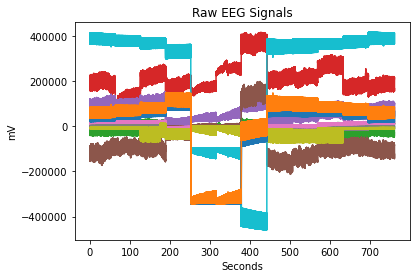

In [9]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, grand_total_time_all_trials/1000, 1/1000)
print('Number of data points/electrode = ' + str(len(t)))
fig, ax = plt.subplots(1,1)
ax.plot(t,Fz,t,Cz,t,Pz,t,Oz,t,P3,t,P4,t,P7,t,P8,t,O1,t,O2,t,A1_REF,t,A2_REF)
ax.set_ylabel('mV')
ax.set_xlabel('Seconds')
ax.set_title('Raw EEG Signals')
plt.show()

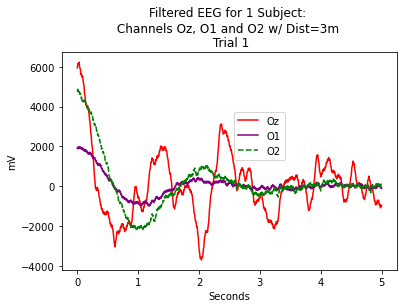

In [55]:
from scipy.signal import butter, sosfilt, sosfreqz, spectrogram

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lower_cutoff = 0.5
upper_cuttoff = 15
#Apply Butterworth bandpass filter with upper and lower cutoff frequencies.
Oz_filtered = butter_bandpass_filter(Oz, lower_cutoff, upper_cuttoff, fs, order=5)
O1_filtered = butter_bandpass_filter(O1, lower_cutoff, upper_cuttoff, fs, order=5)
O2_filtered = butter_bandpass_filter(O2, lower_cutoff, upper_cuttoff, fs, order=5)
fig1, ax1 = plt.subplots(1,1)
ax1.plot(t[0:5000],Oz_filtered[191000:196000], label='Oz', color='red')
ax1.plot(t[0:5000],O1_filtered[191000:196000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax1.plot(t[0:5000],O2_filtered[191000:196000], '--',label='O2', color='green')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds')
ax1.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 1')
ax1.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig1.savefig('ssvep_pilot_2022_3_17_3m_trial_1.png')

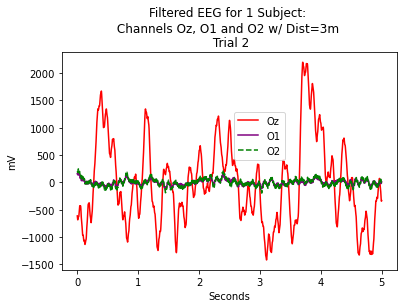

In [56]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(t[0:5000],Oz_filtered[272000:277000], label='Oz', color='red')
ax2.plot(t[0:5000],O1_filtered[272000:277000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax2.plot(t[0:5000],O2_filtered[272000:277000], '--',label='O2', color='green')

ax2.set_ylabel('mV')
ax2.set_xlabel('Seconds')
ax2.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 2')
ax2.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig2.savefig('ssvep_pilot_2022_3_17_3m_trial_2.png')

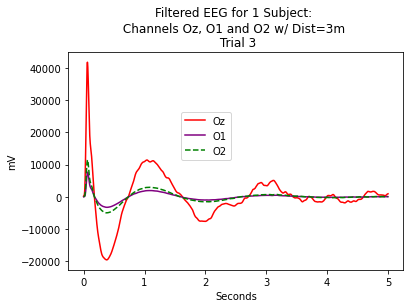

In [57]:
fig3, ax3 = plt.subplots(1,1)
ax3.plot(t[0:5000],Oz_filtered[315000:320000], label='Oz', color='red')
ax3.plot(t[0:5000],O1_filtered[315000:320000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax3.plot(t[0:5000],O2_filtered[315000:320000], '--',label='O2', color='green')

ax3.set_ylabel('mV')
ax3.set_xlabel('Seconds')
ax3.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 3')
ax3.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig3.savefig('ssvep_pilot_2022_3_17_3m_trial_3.png')

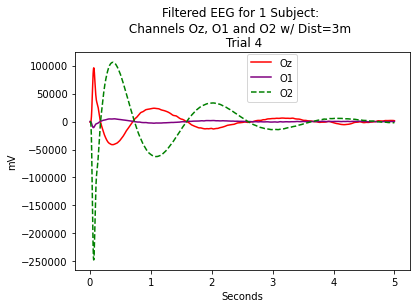

In [58]:
fig4, ax4 = plt.subplots(1,1)
ax4.plot(t[0:5000],Oz_filtered[378000:383000], label='Oz', color='red')
ax4.plot(t[0:5000],O1_filtered[378000:383000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax4.plot(t[0:5000],O2_filtered[378000:383000], '--',label='O2', color='green')

ax4.set_ylabel('mV')
ax4.set_xlabel('Seconds')
ax4.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 4')
ax4.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig4.savefig('ssvep_pilot_2022_3_17_3m_trial_4.png')

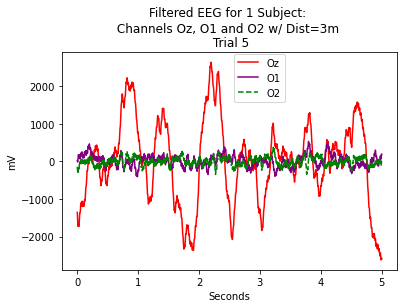

In [59]:
fig5, ax5 = plt.subplots(1,1)
ax5.plot(t[0:5000],Oz_filtered[462000:467000], label='Oz', color='red')
ax5.plot(t[0:5000],O1_filtered[462000:467000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax5.plot(t[0:5000],O2_filtered[462000:467000], '--',label='O2', color='green')

ax5.set_ylabel('mV')
ax5.set_xlabel('Seconds')
ax5.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 5')
ax5.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig5.savefig('ssvep_pilot_2022_3_17_3m_trial_5.png')

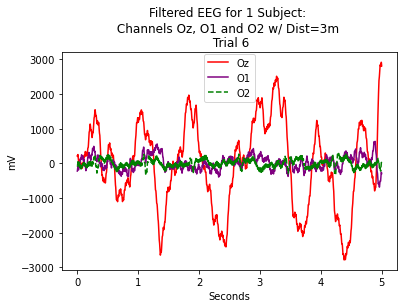

In [60]:
fig6, ax6 = plt.subplots(1,1)
ax6.plot(t[0:5000],Oz_filtered[526000:531000], label='Oz', color='red')
ax6.plot(t[0:5000],O1_filtered[526000:531000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax6.plot(t[0:5000],O2_filtered[526000:531000], '--',label='O2', color='green')

ax6.set_ylabel('mV')
ax6.set_xlabel('Seconds')
ax6.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 6')
ax6.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig6.savefig('ssvep_pilot_2022_3_17_3m_trial_6.png')

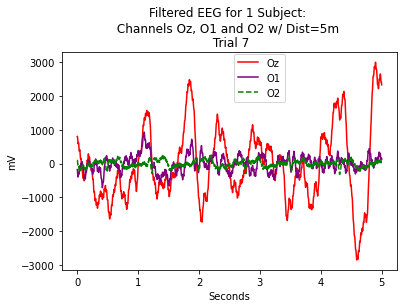

In [49]:
fig7, ax7 = plt.subplots(1,1)
ax7.plot(t[0:5000],Oz_filtered[591000:596000], label='Oz', color='red')
ax7.plot(t[0:5000],O1_filtered[591000:596000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax7.plot(t[0:5000],O2_filtered[591000:596000], '--',label='O2', color='green')

ax7.set_ylabel('mV')
ax7.set_xlabel('Seconds')
ax7.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 7')
ax7.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig7.savefig('ssvep_pilot_2022_3_17_5m_trial_7.png')

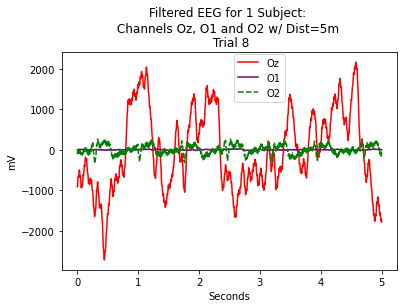

In [50]:
fig8, ax8 = plt.subplots(1,1)
ax8.plot(t[0:5000],Oz_filtered[673000:678000], label='Oz', color='red')
ax8.plot(t[0:5000],O1_filtered[673000:678000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax8.plot(t[0:5000],O2_filtered[673000:678000], '--',label='O2', color='green')

ax8.set_ylabel('mV')
ax8.set_xlabel('Seconds')
ax8.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 8')
ax8.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig8.savefig('ssvep_pilot_2022_3_17_5m_trial_8.png')

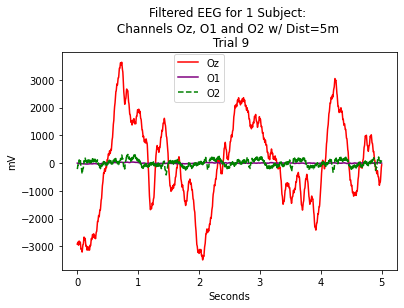

In [51]:
fig9, ax9 = plt.subplots(1,1)
ax9.plot(t[0:5000],Oz_filtered[716000:721000], label='Oz', color='red')
ax9.plot(t[0:5000],O1_filtered[716000:721000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax9.plot(t[0:5000],O2_filtered[716000:721000], '--',label='O2', color='green')

ax9.set_ylabel('mV')
ax9.set_xlabel('Seconds')
ax9.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 9')
ax9.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig9.savefig('ssvep_pilot_2022_3_17_5m_trial_9.png')

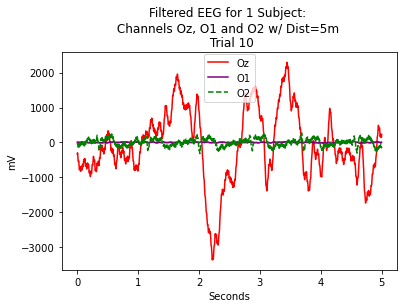

In [52]:
fig10, ax10 = plt.subplots(1,1)
ax10.plot(t[0:5000],Oz_filtered[20000:25000], label='Oz', color='red')
ax10.plot(t[0:5000],O1_filtered[20000:25000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax10.plot(t[0:5000],O2_filtered[20000:25000], '--',label='O2', color='green')

ax10.set_ylabel('mV')
ax10.set_xlabel('Seconds')
ax10.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 10')
ax10.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig10.savefig('ssvep_pilot_2022_3_17_5m_trial_10.png')

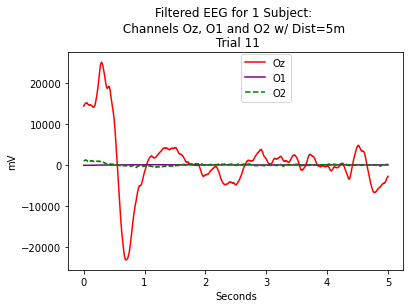

In [53]:
fig11, ax11 = plt.subplots(1,1)
ax11.plot(t[0:5000],Oz_filtered[65000:70000], label='Oz', color='red')
ax11.plot(t[0:5000],O1_filtered[65000:70000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax11.plot(t[0:5000],O2_filtered[65000:70000], '--',label='O2', color='green')

ax11.set_ylabel('mV')
ax11.set_xlabel('Seconds')
ax11.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 11')
ax11.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig11.savefig('ssvep_pilot_2022_3_17_5m_trial_11.png')

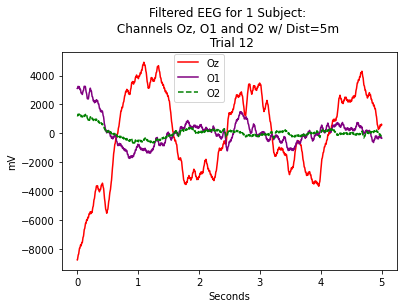

In [54]:
fig12, ax12 = plt.subplots(1,1)
ax12.plot(t[0:5000],Oz_filtered[128000:133000], label='Oz', color='red')
ax12.plot(t[0:5000],O1_filtered[128000:133000], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax12.plot(t[0:5000],O2_filtered[128000:133000], '--',label='O2', color='green')

ax12.set_ylabel('mV')
ax12.set_xlabel('Seconds')
ax12.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=5m  \n Trial 12')
ax12.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()
fig12.savefig('ssvep_pilot_2022_3_17_5m_trial_12.png')

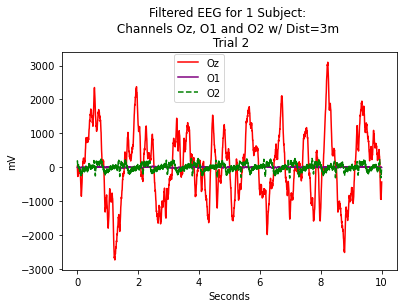

In [47]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lower_cutoff = 0.5
upper_cuttoff = 15
#Apply Butterworth bandpass filter with upper and lower cutoff frequencies.
Oz_filtered = butter_bandpass_filter(Oz, lower_cutoff, upper_cuttoff, fs, order=5)
O1_filtered = butter_bandpass_filter(O1, lower_cutoff, upper_cuttoff, fs, order=5)
O2_filtered = butter_bandpass_filter(O2, lower_cutoff, upper_cuttoff, fs, order=5)
fig2, ax2 = plt.subplots(1,1)
ax2.plot(t[0:10000],Oz_filtered[77999:87999], label='Oz', color='red')
ax2.plot(t[0:10000],O1_filtered[77999:87999], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax2.plot(t[0:10000],O2_filtered[77999:87999], '--',label='O2', color='green')

ax2.set_ylabel('mV')
ax2.set_xlabel('Seconds')
ax2.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 2')
ax2.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()

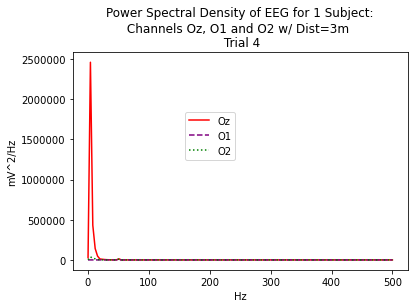

In [48]:
#Calculate power spectral density values for O1, O2 and Oz.
#"Window" parameter for spectrogram module set to 0.25 by default; same as Fan et al. paper.
f_Oz, t_spectrogram, Oz_pwr_spectral_density_trial1 = spectrogram(np.array([Oz_filtered[77999:87999]]), fs)
f_O1, t_spectrogram, O1_pwr_spectral_density_trial1 = spectrogram(np.array([O1_filtered[77999:87999]]), fs)
f_O2, t_spectrogram, O2_pwr_spectral_density_trial1 = spectrogram(np.array([O2_filtered[77999:87999]]), fs)

fig2, ax2 = plt.subplots(1,1)
ax2.plot(f_Oz,np.sum(Oz_pwr_spectral_density_trial1[0],1), label='Oz', color='red')
ax2.plot(f_O1,np.sum(O1_pwr_spectral_density_trial1[0],1), '--', label='O1', color='purple')
ax2.plot(f_O2,np.sum(O2_pwr_spectral_density_trial1[0],1), ':', label='O2', color='green')
ax2.set_ylabel('mV^2/Hz')
ax2.set_xlabel('Hz')
ax2.set_title('Power Spectral Density of EEG for 1 Subject:\n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 4')
ax2.legend(bbox_to_anchor=(0.5, 0.75))
plt.ticklabel_format(axis="y", style='plain')
plt.show()

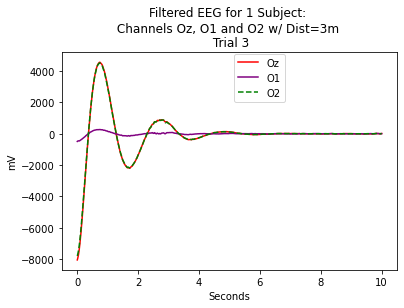

In [18]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 1000.0
lower_cutoff = 0.5
upper_cuttoff = 15
#Apply Butterworth bandpass filter with upper and lower cutoff frequencies.
Oz_filtered = butter_bandpass_filter(Oz, lower_cutoff, upper_cuttoff, fs, order=5)
O1_filtered = butter_bandpass_filter(O1, lower_cutoff, upper_cuttoff, fs, order=5)
O2_filtered = butter_bandpass_filter(O2, lower_cutoff, upper_cuttoff, fs, order=5)
fig3, ax3 = plt.subplots(1,1)
ax3.plot(t[0:10000],Oz_filtered[141998:151998], label='Oz', color='red')
ax3.plot(t[0:10000],O1_filtered[141998:151998], label='O1', color='purple') #Duration of each EEG channel is 8 seconds.
ax3.plot(t[0:10000],O2_filtered[141998:151998], '--',label='O2', color='green')

ax3.set_ylabel('mV')
ax3.set_xlabel('Seconds')
ax3.set_title('Filtered EEG for 1 Subject: \n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 3')
ax3.legend(bbox_to_anchor=(0.5, 0.75))
plt.show()

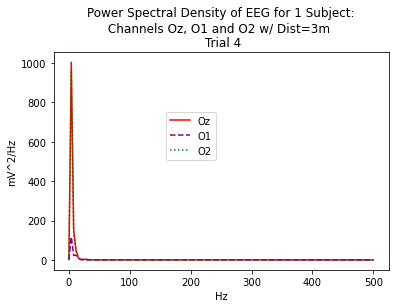

In [8]:
#Calculate power spectral density values for O1, O2 and Oz.
#"Window" parameter for spectrogram module set to 0.25 by default; same as Fan et al. paper.
f_Oz, t_spectrogram, Oz_pwr_spectral_density_trial1 = spectrogram(np.array([Oz_filtered[145998:151998]]), fs)
f_O1, t_spectrogram, O1_pwr_spectral_density_trial1 = spectrogram(np.array([O1_filtered[145998:151998]]), fs)
f_O2, t_spectrogram, O2_pwr_spectral_density_trial1 = spectrogram(np.array([O2_filtered[145998:151998]]), fs)

fig3, ax3 = plt.subplots(1,1)
ax3.plot(f_Oz,np.sum(Oz_pwr_spectral_density_trial1[0],1), label='Oz', color='red')
ax3.plot(f_O1,np.sum(O1_pwr_spectral_density_trial1[0],1), '--', label='O1', color='purple')
ax3.plot(f_O2,np.sum(O2_pwr_spectral_density_trial1[0],1), ':', label='O2', color='green')
ax3.set_ylabel('mV^2/Hz')
ax3.set_xlabel('Hz')
ax3.set_title('Power Spectral Density of EEG for 1 Subject:\n Channels Oz, O1 and O2 w/ Dist=3m  \n Trial 4')
ax3.legend(bbox_to_anchor=(0.5, 0.75))
plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Oz_features_trial1 = np.sort(np.sum(Oz_pwr_spectral_density_trial1[0],1))[-4:None].tolist()
O1_features_trial1 = np.sort(np.sum(O1_pwr_spectral_density_trial1[0],1))[-4:None].tolist()
O2_features_trial1 = np.sort(np.sum(O2_pwr_spectral_density_trial1[0],1))[-4:None].tolist()
Oz_features_trial2 = np.sort(np.sum(Oz_pwr_spectral_density_trial2[0],1))[-4:None].tolist()
O1_features_trial2 = np.sort(np.sum(O1_pwr_spectral_density_trial2[0],1))[-4:None].tolist()
O2_features_trial2 = np.sort(np.sum(O2_pwr_spectral_density_trial2[0],1))[-4:None].tolist()
Oz_features_trial4 = np.sort(np.sum(Oz_pwr_spectral_density_trial4[0],1))[-4:None].tolist()
O1_features_trial4 = np.sort(np.sum(O1_pwr_spectral_density_trial4[0],1))[-4:None].tolist()
O2_features_trial4 = np.sort(np.sum(O2_pwr_spectral_density_trial4[0],1))[-4:None].tolist()
X = np.array([[Oz_features_trial1[0], Oz_features_trial1[1], 
              O1_features_trial1[0], O1_features_trial1[1], 
              O2_features_trial1[0], O2_features_trial1[1]],
             [Oz_features_trial2[0], Oz_features_trial2[1], 
              O1_features_trial2[0], O1_features_trial2[1], 
              O2_features_trial2[0], O2_features_trial2[1]],
             [Oz_features_trial4[0], Oz_features_trial4[1], 
              O1_features_trial4[0], O1_features_trial4[1], 
              O2_features_trial4[0], O2_features_trial4[1]]
             ])
print(X.shape)
y = np.array([3,3,100])
print(y.shape)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)



NameError: name 'Oz_pwr_spectral_density_trial2' is not defined

In [ ]:
print(clf.predict([[Oz_features_trial4[0], Oz_features_trial4[1], 
              O1_features_trial4[0], O1_features_trial4[1], 
              O2_features_trial4[0], O2_features_trial4[1]]]))

In [ ]:
Oz_features_trial3 = np.sort(np.sum(Oz_pwr_spectral_density_trial3[0],1))[-2:None].tolist()
O1_features_trial3 = np.sort(np.sum(O1_pwr_spectral_density_trial3[0],1))[-2:None].tolist()
O2_features_trial3 = np.sort(np.sum(O2_pwr_spectral_density_trial3[0],1))[-2:None].tolist()

print(clf.predict([[Oz_features_trial3[0], Oz_features_trial3[1], 
              O1_features_trial3[0], O1_features_trial3[1], 
              O2_features_trial3[0], O2_features_trial3[1]]]))